In [1]:
import os
import sys
import warnings

import mne
from anlffr.helper import biosemi2mne as bs
from matplotlib import pyplot as plt
import numpy as np

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi']  = 120

In [2]:
from bdf_preproc import poolBDF
pwd = os.getcwd();

subj = 'S360';
cond = 'YNH';


trialID = '*RAM*';

EFR = 1; #change to 1 if you want to look at EFRs
local = 0;

if local:
    #Local Storage
    measure_dir = '/mnt/ECF4E22CF4E1F92A/Research/Data_Backup/Pitch_Study/F30_Full_Data/ACC/SNAPLab/';
    
else:
    #Ext Drive
    measure_dir = '/media/sivaprakasaman/AndrewNVME/Pitch_Study/Pitch_Diagnostics_SH_AS/EFR_RAM/Human/';

data_dir = measure_dir+cond+'/'+subj;
out_loc = data_dir + '/Preprocessed';

os.chdir(data_dir);

refchans = ['EXG1','EXG2'];
# refchans = ['EXG3','EXG4'];

if EFR:
    filtband = [60,4000];
    fs_new = 2*filtband[1];

else:
    filtband = [1,25];
    fs_new = 4e3;

raw, eves, files = poolBDF(trialID, refchans, filtband, fs_new = fs_new)
fname = subj+'_RAM_EFR_preProcessed.mat';
try:
    os.mkdir('Preprocessed')
except OSError as error:
    print('Directory Present') 

os.chdir(pwd);

['S360_RAM_EFR.bdf', 'S360_RAM_EFR+001.bdf']
Extracting EDF parameters from /media/sivaprakasaman/AndrewNVME/Pitch_Study/Pitch_Diagnostics_SH_AS/EFR_RAM/Human/YNH/S360/S360_RAM_EFR.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130560 (consider using initial_event=True to detect this event)
828 events found
Event IDs: [  1   2 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 60 - 4e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 60.00
- Lower transition bandwidth: 15.00 Hz (-6 dB cutoff 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    6.0s finished


Resampling to 8000Hz and updating event indices
1696 events found
Event IDs: [    1     2     3     4     5     7     8     9    10    11    12    13
    14    15    16    17    19    20    21    22    23    24    25    26
    27    28    29    30    31    32    33    34    35    36    37    38
    39    40    41    42    43    44    45    46    47    48    49    50
    51    52    53    54    55    56    57    58    59    60    61    62
    63    64    65    66    67    68    69    70    71    72    73    75
    76    77    79    81    83    84    85    86    87    88    91    93
    95    96    99   100   101   102   103   104   106   107   108   109
   110   111   112   113   114   115   116   117   118   119   120   121
   122   124   126   127   129   130   131   132   133   134   135   136
   137   138   139   140   141   142   143   144   145   150   151   153
   156   157   160   162   164   166   168   172   173   175   178   179
   180   182   183   184   187   188   189   19

Setting up band-pass filter from 60 - 4e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 60.00
- Lower transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 52.50 Hz)
- Upper passband edge: 4000.00 Hz
- Upper transition bandwidth: 96.00 Hz (-6 dB cutoff frequency: 4048.00 Hz)
- Filter length: 1803 samples (0.220 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Resampling to 8000Hz and updating event indices
174 events found
Event IDs: [1]


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


167 events found
Event IDs: [1]


Using matplotlib as 2D backend.


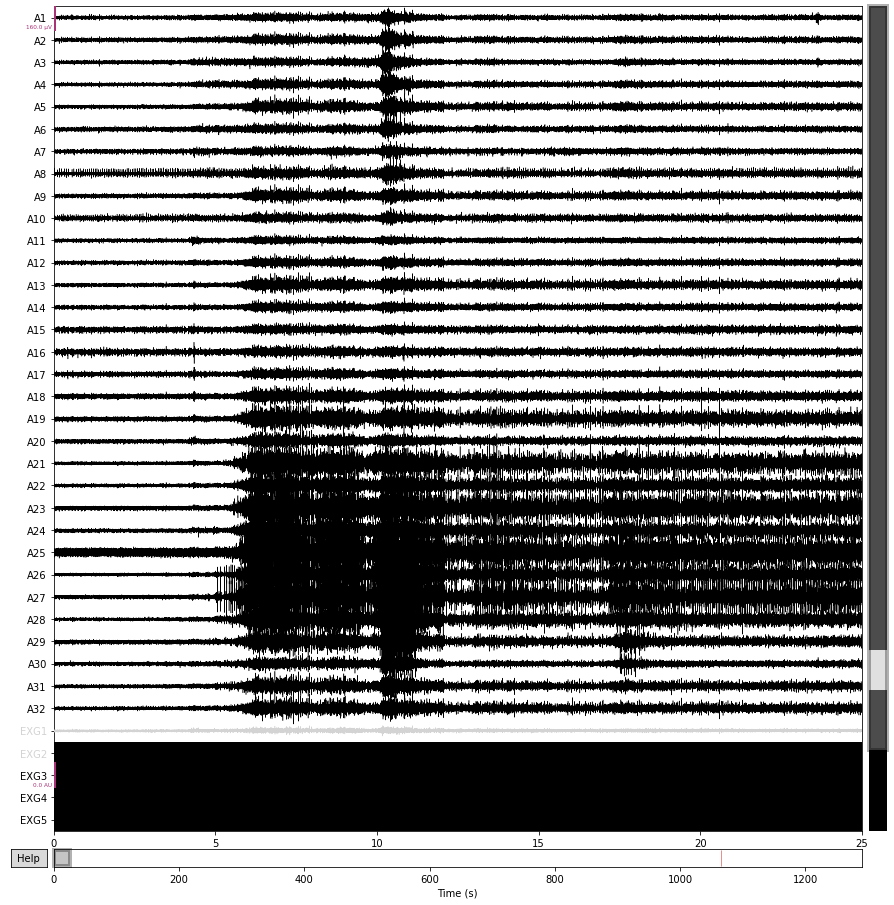

In [3]:
%matplotlib inline
raw.plot(duration = 25.0, scalings = dict(eeg=80e-6), n_channels = 37);

In [4]:
bad_chans = ['EXG3','EXG4','EXG5'];
raw.drop_channels(bad_chans);
raw.info

<Info | 10 non-empty values
 bads: 2 items (EXG1, EXG2)
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 34 EEG, 3 misc, 1 Stimulus
 custom_ref_applied: True
 dig: 43 items (3 Cardinal, 34 EEG, 6 Extra)
 highpass: 60.0 Hz
 lowpass: 1667.0 Hz
 meas_date: 2023-06-26 16:43:49 UTC
 nchan: 38
 projs: []
 sfreq: 8000.0 Hz
>

In [5]:
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs

if not EFR:
    blinks = find_blinks(raw)
    epochs_blinks = mne.Epochs(raw, blinks, event_id=998, baseline=(-0.25, 0.25),
                               reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)

    blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=1)
    raw.add_proj(blink_proj)

In [11]:
tbounds = [-0.2,1.2];
bsline = (-.2,0);

pos = 1;
neg = 2;

to_proj = bool(~EFR);

epochs_p = mne.Epochs(raw, eves, event_id=pos, baseline=bsline, proj=to_proj,
                    tmin=tbounds[0], tmax=tbounds[1], reject=dict(eeg=80e-5), verbose = 'ERROR')

epochs_n = mne.Epochs(raw, eves, event_id=neg, baseline=bsline, proj=to_proj,
                    tmin=tbounds[0], tmax=tbounds[1], reject=dict(eeg=80e-5), verbose = 'ERROR');

In [12]:
chan_names = epochs_p.ch_names;
efr_chans = ['A32'];
cort_chans= efr_chans;

if EFR:
#     chans2pick = mne.pick_channels_regexp(chan_names,'A.');
    chans2pick = mne.pick_channels(chan_names,efr_chans);
else:
    chans2pick = mne.pick_channels(chan_names,cort_chans);

In [13]:
all_epochs_mean_cap = epochs_p.get_data();
all_epochs_mean_cap = all_epochs_mean_cap[:,chans2pick,:];
all_epochs_mean_p = np.mean(all_epochs_mean_cap,1);

cap_p = np.mean(all_epochs_mean_p,0);
cap_p_std_err = np.std(all_epochs_mean_p,0)/np.sqrt(np.size(all_epochs_mean_p,0));

all_epochs_mean_cap = epochs_n.get_data();
all_epochs_mean_cap = all_epochs_mean_cap[:,chans2pick,:];
all_epochs_mean_n = np.mean(all_epochs_mean_cap,1);

cap_n = np.mean(all_epochs_mean_n,0);
cap_n_std_err = np.std(all_epochs_mean_n,0)/np.sqrt(np.size(all_epochs_mean_n,0));

Using data from preloaded Raw for 500 events and 11201 original time points ...
    Rejecting  epoch based on EEG : ['A27']
    Rejecting  epoch based on EEG : ['A27']
    Rejecting  epoch based on EEG : ['A25', 'A26', 'A27', 'A29']
    Rejecting  epoch based on EEG : ['A4']
5 bad epochs dropped
Using data from preloaded Raw for 500 events and 11201 original time points ...
    Rejecting  epoch based on EEG : ['A27']
    Rejecting  epoch based on EEG : ['A27']
    Rejecting  epoch based on EEG : ['A27']
    Rejecting  epoch based on EEG : ['A27']
    Rejecting  epoch based on EEG : ['A27']
    Rejecting  epoch based on EEG : ['A4']
    Rejecting  epoch based on EEG : ['A27']
7 bad epochs dropped


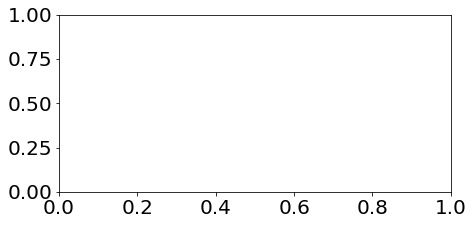

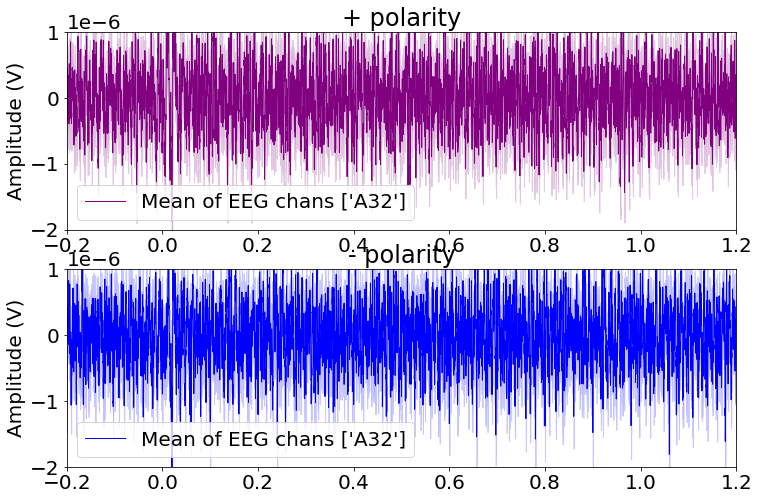

In [14]:
chan_id = np.array(chans2pick);
selected_chans = str([chan_names[index] for index in chan_id]);
tmin = tbounds[0];
t_vect = np.arange(0,np.size(cap_p,0))/fs_new;
t_vect = t_vect + tmin;

plt.rcParams['figure.figsize'] = [12, 8]
#plot params
xlims = tbounds;
# xlims = [0.1,0.8];
ylims = [-2e-6,1e-6];
# ylims = [-9e-7,9e-7];


buff = 0;
plt.figure();
plt.subplot(2,1,1);

plt.plot(t_vect, cap_p-buff,linewidth=1,color = 'purple', label = "Mean of EEG chans "+ selected_chans)
plt.fill_between(t_vect,cap_p+cap_p_std_err-buff,cap_p-cap_p_std_err-buff, color = 'purple', alpha=0.2)

plt.xlim(xlims)
plt.ylim(ylims)
plt.legend(loc=3)
plt.ylabel('Amplitude (V)')
plt.title("+ polarity")

plt.subplot(2,1,2);
plt.plot(t_vect, cap_n-buff,linewidth=1,color = 'blue', label = "Mean of EEG chans "+ selected_chans)
plt.fill_between(t_vect,cap_n+cap_n_std_err-buff,cap_n-cap_n_std_err-buff, color = 'blue', alpha=0.2)

plt.xlim(xlims)
plt.ylim(ylims)
plt.legend(loc=3)
plt.ylabel('Amplitude (V)')
plt.title("- polarity")
plt.rcParams.update({'font.size': 20})
plt.show()

Need more than one channel to make topography for eeg. Disabling interactivity.


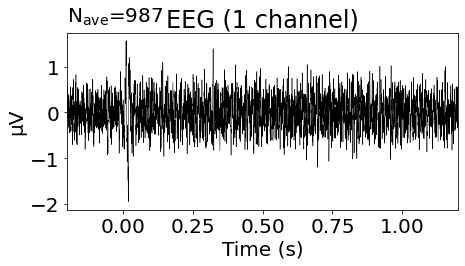

In [15]:
erp_p = epochs_p.average();
erp_n = epochs_n.average();

comb = mne.combine_evoked([erp_p,erp_n],[.5,.5]);
comb.plot(picks = chans2pick);

comb_export = comb.get_data(picks = chans2pick);

<Figure size 864x576 with 0 Axes>

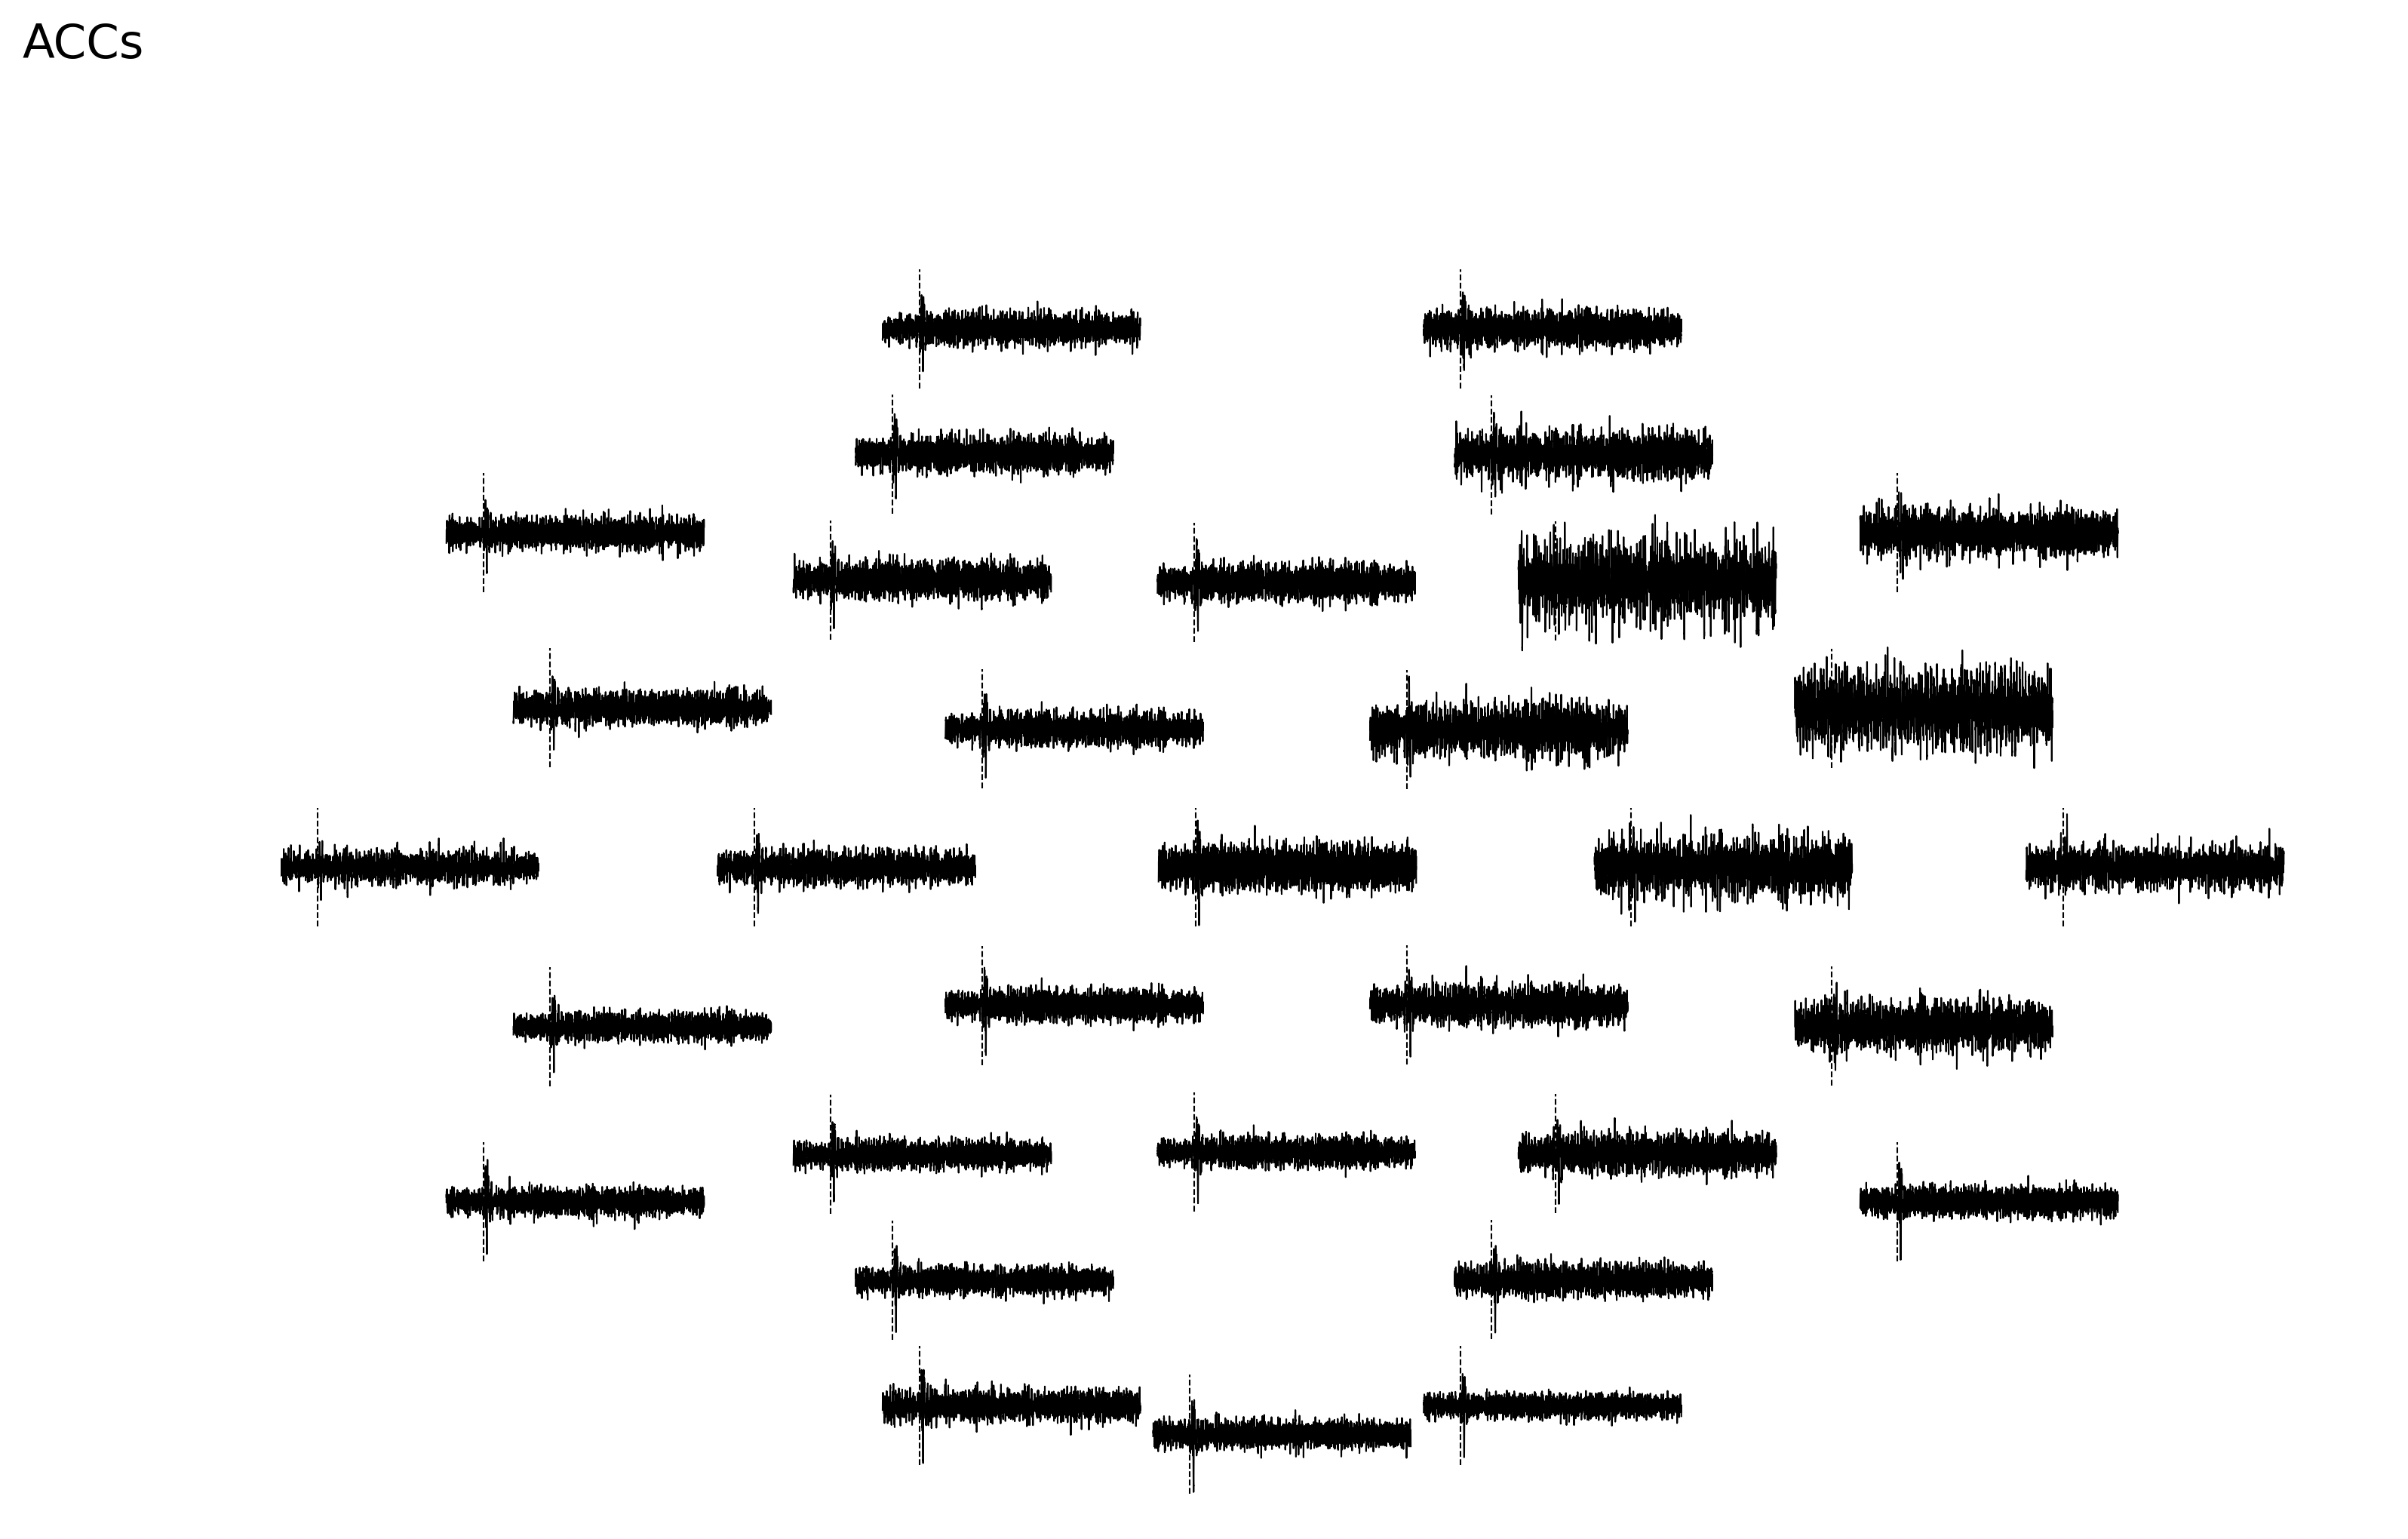

In [16]:
topo_fig = plt.figure();
topo_fig.clear();
# plt.rcParams.update({'figure.figsize': (4,4)})
# plt.rcParams.update({'lines.linewidth': 1})
topo_fig = plt.figure(dpi = 300)
ax = plt.gca();
# topo_fig = erp_up.plot_topo(ylim = dict(eeg=[-4,4]),legend=False, axes = ax,title = 'ACCs', color = 'purple');
topo_fig = comb.plot_topo(ylim = dict(eeg=[-2,2.]),legend=False, axes = ax, title = 'ACCs', color = 'black');
topo_fig.show()
plt.show()

In [17]:
import scipy.io 

os.chdir(out_loc);
scipy.io.savemat(fname, {'time':t_vect,'fs':fs_new,'filt_band':filtband,'mean_p_cap':cap_p, 'std_p_cap':cap_p_std_err,
                         'mean_n_cap':cap_n, 'std_n_cap':cap_n_std_err,
                         'cap_chan_ids':selected_chans,
                         'all_epochs_pos':all_epochs_mean_p,
                         'all_epochs_neg':all_epochs_mean_n,
                        'combined_mean':comb_export});